In [1]:
import networkx as nx
import numpy as np

### ADJACENCY MATRIX A:

In [2]:
A = np.matrix('0,1,0,0,1,0,0,0;1,0,1,0,0,1,0,0;0,1,0,1,0,0,1,0;0,0,1,0,0,0,0,1;1,0,0,0,0,1,0,0;0,1,0,0,1,0,1,0;0,0,1,0,0,1,0,1;0,0,0,1,0,0,1,0')
print(A)

[[0 1 0 0 1 0 0 0]
 [1 0 1 0 0 1 0 0]
 [0 1 0 1 0 0 1 0]
 [0 0 1 0 0 0 0 1]
 [1 0 0 0 0 1 0 0]
 [0 1 0 0 1 0 1 0]
 [0 0 1 0 0 1 0 1]
 [0 0 0 1 0 0 1 0]]


### Drawing graph from the Adjacency matrix

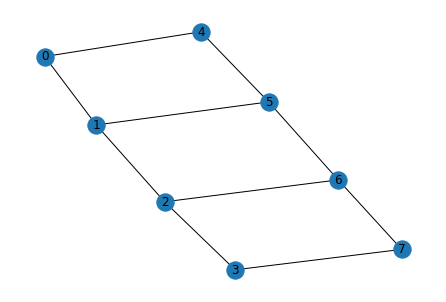

In [3]:
G = nx.from_numpy_matrix(A)  
nx.draw(G, with_labels=True)

## Betweenness Centrality of the graph G

In [4]:
b_c=nx.betweenness_centrality(G, k=None, normalized=False, weight=None, endpoints=False, seed=None)
b_c

{0: 1.0833333333333335,
 1: 5.916666666666667,
 2: 5.916666666666667,
 3: 1.0833333333333335,
 4: 1.0833333333333335,
 5: 5.916666666666667,
 6: 5.916666666666666,
 7: 1.0833333333333335}

## Closeness Centrality of the graph G

In [5]:
c_c=nx.closeness_centrality(G, u=None, distance=None, wf_improved=True)
c_c

{0: 0.4375,
 1: 0.5833333333333334,
 2: 0.5833333333333334,
 3: 0.4375,
 4: 0.4375,
 5: 0.5833333333333334,
 6: 0.5833333333333334,
 7: 0.4375}

## Degree Centrality of the graph G

### With networkx

In [6]:
d=nx.degree_centrality(G)
print("Degree Centalities for the graph G is: \n",d)

Degree Centalities for the graph G is: 
 {0: 0.2857142857142857, 1: 0.42857142857142855, 2: 0.42857142857142855, 3: 0.2857142857142857, 4: 0.2857142857142857, 5: 0.42857142857142855, 6: 0.42857142857142855, 7: 0.2857142857142857}


### Without networkx

In [7]:
# creating a copy of Adjacency matrix:
B = A.copy()

def summ(graph, a):
    sum_deg = 0
    # Summing all columns in the row
    for column in range(8):
        sum_deg += graph[a,column]
    return sum_deg

def degCen(a):
    sum_deg = summ(B, a)
    # dividing the sum of the degree with the (n-1) nodes
    deg_cen = (sum_deg/(8-1))
    return deg_cen

In [8]:
d_c = [degCen(a) for a in range(8)]
print("Degree Centralities of the Graph G is: \n", d_c)

Degree Centralities of the Graph G is: 
 [0.2857142857142857, 0.42857142857142855, 0.42857142857142855, 0.2857142857142857, 0.2857142857142857, 0.42857142857142855, 0.42857142857142855, 0.2857142857142857]


## Freemans Centrality is given by
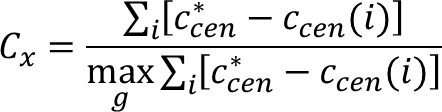

**$ C_x=\frac{\sum_{i}\left[{c_{cen}^\ast-c}_{cen}(i)\right]}{\max g{\sum_{i}\left[{c_{cen}^\ast-c}_{cen}(i)\right]}} $**

In [9]:
d_max=max(d.values())
print('Maximum value of degree centrality is:',d_max)

Maximum value of degree centrality is: 0.42857142857142855


In [10]:
values=[]
for i in range(8):
    s=d_max-d[i]
    values.append(s)   
values

[0.14285714285714285,
 0.0,
 0.0,
 0.14285714285714285,
 0.14285714285714285,
 0.0,
 0.0,
 0.14285714285714285]

In [11]:
numerator=sum(values)
numerator

0.5714285714285714

### Denominator is for a star graph with 8 vertices

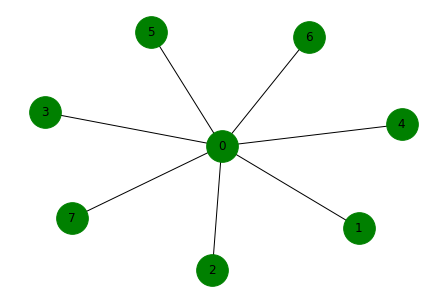

In [12]:
G1 = nx.star_graph(7)
nx.draw(G1, node_color = 'green',node_size = 1000,with_labels = True)

In [13]:
d1=nx.degree_centrality(G1)
d1

{0: 1.0,
 1: 0.14285714285714285,
 2: 0.14285714285714285,
 3: 0.14285714285714285,
 4: 0.14285714285714285,
 5: 0.14285714285714285,
 6: 0.14285714285714285,
 7: 0.14285714285714285}

In [14]:
d1_max=max(d1.values())
d1_max

1.0

In [15]:
values1=[]
for i in range(8):
    s1=d1_max-d1[i]
    values1.append(s1)   
values1

[0.0,
 0.8571428571428572,
 0.8571428571428572,
 0.8571428571428572,
 0.8571428571428572,
 0.8571428571428572,
 0.8571428571428572,
 0.8571428571428572]

In [16]:
denominator=max(values1)
denominator

0.8571428571428572

In [17]:
freeman_centrality=numerator/denominator
freeman_centrality

0.6666666666666666